## Please follow this source (case):

https://thinkingneuron.com/computer-price-prediction-case-study-in-python/

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('Cleansed_v1.1.csv')
df.shape

(896, 25)

## Extended Data Dictionary 

In [3]:
df.describe()

,ram_,ssd,hdd,Rom_is_SSD,ROM_Capacity,graphic_card_,External_graphic_card,display_size,warranty,latest_price_USD,old_price_USD,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,564.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,8.531250,432.321429,226.857143,0.831473,570.035714,1.198661,0.295759,15.122021,0.691964,992.028186,1145.744002,2.980469,367.391741,46.152902
std,4.376055,316.118420,405.394129,0.374542,294.627406,2.057454,0.456638,0.984664,0.606282,605.973607,724.355392,1.965254,1106.309355,136.079586
min,4.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000,12.200000,0.000000,181.870000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,256.000000,0.000000,1.000000,512.000000,0.000000,0.000000,14.000000,0.000000,591.370000,714.226500,0.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,1.000000,512.000000,0.000000,0.000000,15.600000,1.000000,825.422000,1014.682500,4.100000,19.000000,3.000000
75%,8.000000,512.000000,512.000000,1.000000,512.000000,2.000000,1.000000,16.000000,1.000000,1158.170000,1443.253500,4.400000,179.500000,23.250000
max,32.000000,3072.000000,2048.000000,1.000000,3072.000000,8.000000,1.000000,17.300000,3.000000,5745.870000,4911.374000,5.000000,15279.000000,1947.000000


## Basic Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  896 non-null    object 
 1   model                  801 non-null    object 
 2   processor_brand        896 non-null    object 
 3   processor_name         896 non-null    object 
 4   processor_gnrtn        896 non-null    object 
 5   ram_                   896 non-null    int64  
 6   ram_type               896 non-null    object 
 7   ssd                    896 non-null    int64  
 8   hdd                    896 non-null    int64  
 9   Rom_is_SSD             896 non-null    int64  
 10  ROM_Capacity           896 non-null    int64  
 11  os                     896 non-null    object 
 12  os_bit                 896 non-null    object 
 13  graphic_card_          896 non-null    int64  
 14  External_graphic_card  896 non-null    int64  
 15  weight

## Removing useless columns from the data

In [5]:
# Deleted "model" due to high cardinaltiy and "display_size" cause of large number of missing values.
# "ssd" & "hdd", a categorical variable "Rom_is_SSD" was derived from them.
# "ssd" & "hdd", a numerical variable "ROM_Capacity" was derived from them.
df.drop(['ssd','hdd'],axis=1, inplace=True) 

## Missing values treatment

In [6]:
# Deleted "model" variable due to high cardinaltiy and missing values.
# Deleted "display_size" variable cause of large number of missing values.
df.drop(['model','display_size'],axis=1, inplace=True) 


# Note: If a column has more than 30% data missing, then missing value treatment cannot be done. 
# That column must be rejected because too much information is missing.

In [7]:
df.isnull().sum()

brand                    0
processor_brand          0
processor_name           0
processor_gnrtn          0
ram_                     0
ram_type                 0
Rom_is_SSD               0
ROM_Capacity             0
os                       0
os_bit                   0
graphic_card_            0
External_graphic_card    0
weight                   0
warranty                 0
Touchscreen              0
msoffice                 0
latest_price_USD         0
old_price_USD            0
star_rating              0
ratings                  0
reviews                  0
dtype: int64

## Outlier treatment

In [8]:
lower_limit=df['ram_'].quantile(0)
upper_limit=df['ram_'].quantile(0.95)

lower_limit=df['warranty'].quantile(0)
upper_limit=df['warranty'].quantile(0.95)

lower_limit=df['graphic_card_'].quantile(0)
upper_limit=df['graphic_card_'].quantile(0.95)

lower_limit=df['reviews'].quantile(0)
upper_limit=df['reviews'].quantile(0.95)

lower_limit=df['ROM_Capacity'].quantile(0)
upper_limit=df['ROM_Capacity'].quantile(0.95)

lower_limit=df['latest_price_USD'].quantile(0)
upper_limit=df['latest_price_USD'].quantile(0.95)

lower_limit=df['old_price_USD'].quantile(0)
upper_limit=df['old_price_USD'].quantile(0.95)

#lower_limit=df['ratings'].quantile(0)
#upper_limit=df['ratings'].quantile(1)

#removing all the outliers from dataset
new_df=df[(df['ram_']>lower_limit) & (df['ram_']<upper_limit)]
new_df=df[(df['warranty']>lower_limit) & (df['warranty']<upper_limit)]
new_df=df[(df['graphic_card_']>lower_limit) & (df['graphic_card_']<upper_limit)]
new_df=df[(df['reviews']>lower_limit) & (df['reviews']<upper_limit)]
new_df=df[(df['ROM_Capacity']>lower_limit) & (df['ROM_Capacity']<upper_limit)]
new_df=df[(df['latest_price_USD']>lower_limit) & (df['latest_price_USD']<upper_limit)]
new_df=df[(df['old_price_USD']>lower_limit) & (df['old_price_USD']<upper_limit)]
#new_df=df[(df['ratings']>lower_limit) & (df['ratings']<upper_limit)]

#new_df.to_csv('Cleansed_v4.csv', index=False) # To export the data to csv file.

In [9]:
print("Number of removed outliers:", len(df)-len(new_df), "\nNew data shape:",new_df.shape)  

Number of removed outliers: 96 
New data shape: (800, 21)


<AxesSubplot:>

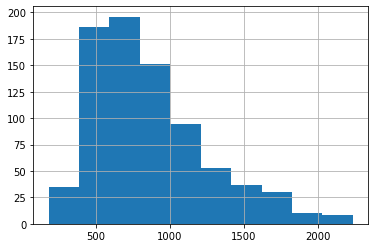

In [10]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
new_df['latest_price_USD'].hist()

In [11]:
new_df.describe()

,ram_,Rom_is_SSD,ROM_Capacity,graphic_card_,External_graphic_card,warranty,latest_price_USD,old_price_USD,star_rating,ratings,reviews
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,8.24000,0.848750,542.120000,1.020000,0.265000,0.706250,870.378194,1101.472840,3.084500,402.651250,50.138750
std,4.05005,0.358517,263.179035,1.847665,0.441609,0.598254,383.076855,476.301521,1.905295,1159.883573,141.350422
min,4.00000,0.000000,32.000000,0.000000,0.000000,0.000000,181.870000,259.987000,0.000000,0.000000,0.000000
25%,4.00000,1.000000,256.000000,0.000000,0.000000,0.000000,571.870000,742.235000,0.000000,0.000000,0.000000
50%,8.00000,1.000000,512.000000,0.000000,0.000000,1.000000,779.870000,1017.906500,4.100000,24.500000,3.000000
75%,8.00000,1.000000,512.000000,2.000000,1.000000,1.000000,1041.592500,1390.870000,4.400000,206.250000,27.000000
max,32.00000,1.000000,2048.000000,8.000000,1.000000,3.000000,2237.170000,2508.701000,5.000000,15279.000000,1947.000000


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 895
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  800 non-null    object 
 1   processor_brand        800 non-null    object 
 2   processor_name         800 non-null    object 
 3   processor_gnrtn        800 non-null    object 
 4   ram_                   800 non-null    int64  
 5   ram_type               800 non-null    object 
 6   Rom_is_SSD             800 non-null    int64  
 7   ROM_Capacity           800 non-null    int64  
 8   os                     800 non-null    object 
 9   os_bit                 800 non-null    object 
 10  graphic_card_          800 non-null    int64  
 11  External_graphic_card  800 non-null    int64  
 12  weight                 800 non-null    object 
 13  warranty               800 non-null    int64  
 14  Touchscreen            800 non-null    object 
 15  msoffi

## Visual Exploratory Data Analysis

In [13]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

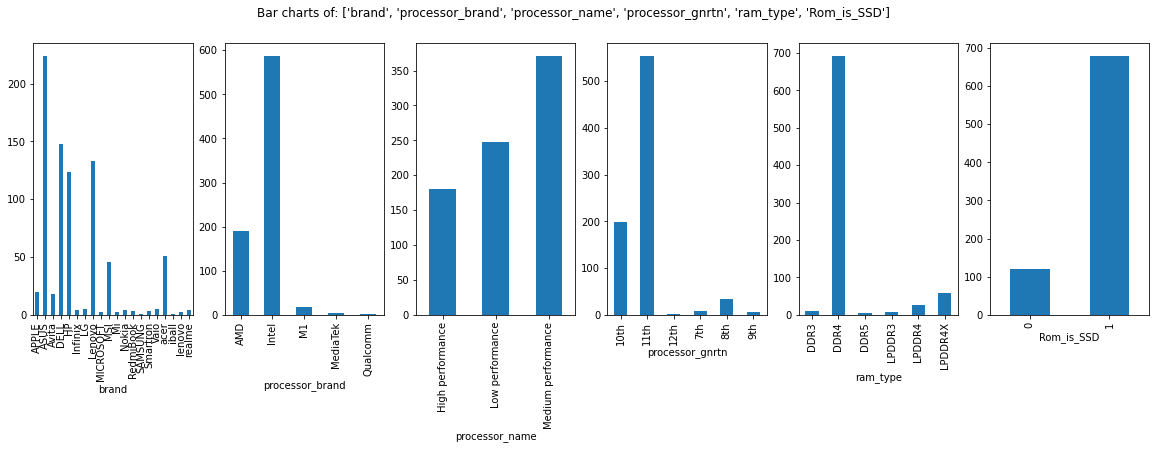

In [14]:
# Calling the function
PlotBarCharts(inpData=new_df, colsToPlot=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 
                                          'ram_type', 'Rom_is_SSD'])

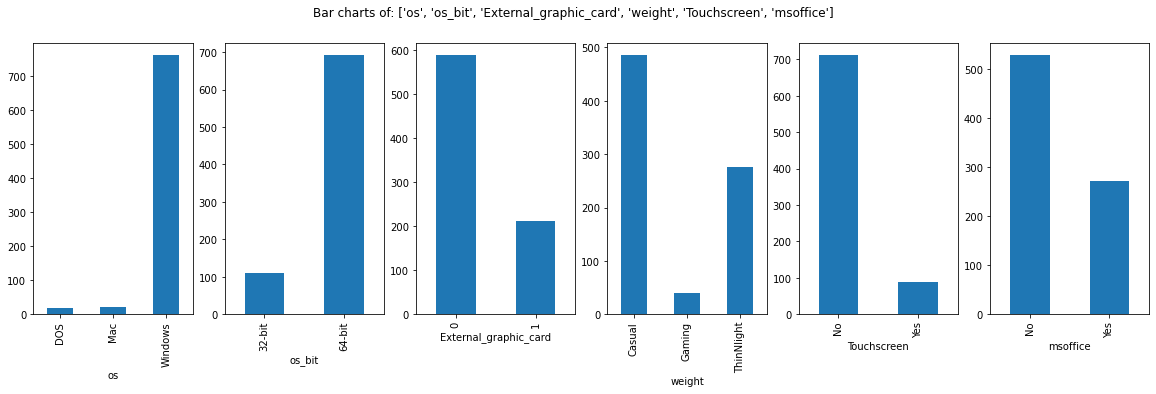

In [15]:
PlotBarCharts(inpData=new_df, colsToPlot=['os', 'os_bit', 'External_graphic_card', 
                                          'weight','Touchscreen', 'msoffice'])

array([[<AxesSubplot:title={'center':'ram_'}>,
        <AxesSubplot:title={'center':'ROM_Capacity'}>],
       [<AxesSubplot:title={'center':'graphic_card_'}>,
        <AxesSubplot:title={'center':'warranty'}>]], dtype=object)

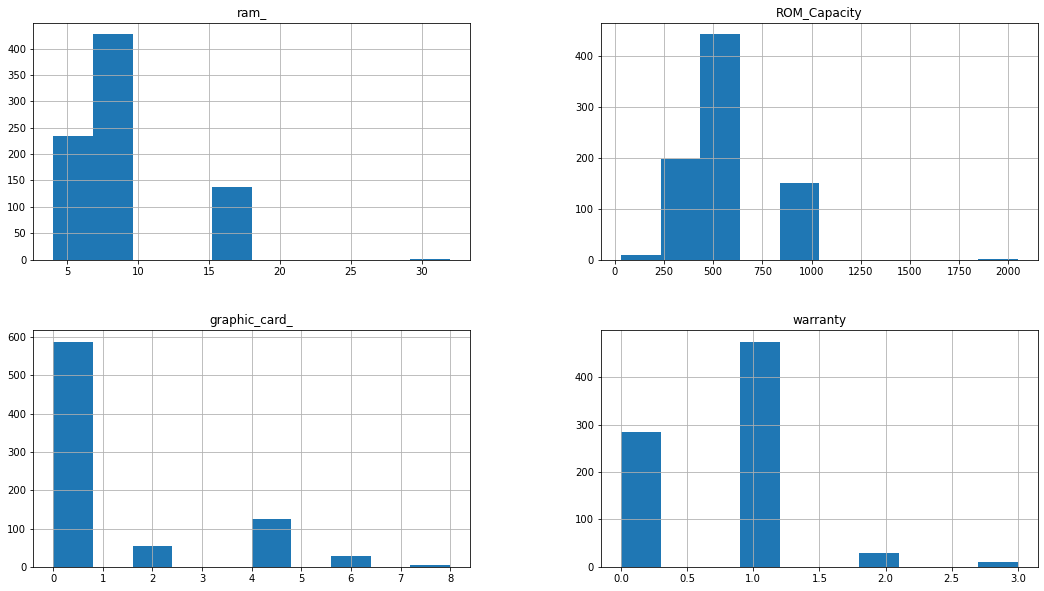

In [16]:
# Plotting histograms of multiple columns together
new_df.hist(['ram_', 'ROM_Capacity', 'graphic_card_', 'warranty'], figsize=(18,10))

array([[<AxesSubplot:title={'center':'latest_price_USD'}>,
        <AxesSubplot:title={'center':'old_price_USD'}>],
       [<AxesSubplot:title={'center':'ratings'}>,
        <AxesSubplot:title={'center':'reviews'}>],
       [<AxesSubplot:title={'center':'star_rating'}>, <AxesSubplot:>]],
      dtype=object)

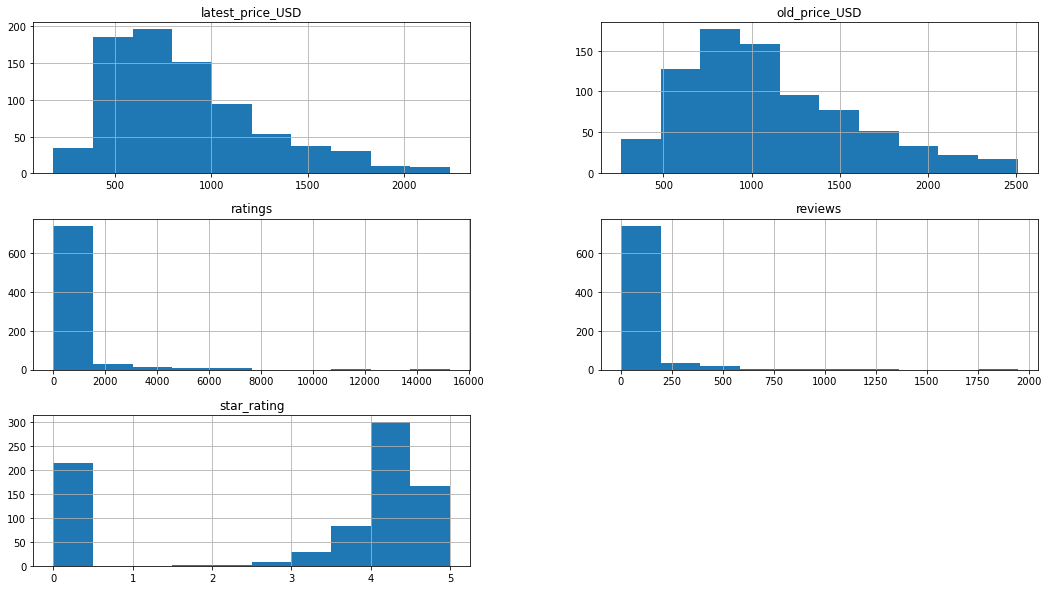

In [17]:
new_df.hist(['latest_price_USD','old_price_USD','ratings', 'reviews', 'star_rating'], figsize=(18,10))

array([[<AxesSubplot:title={'center':'ratings'}>,
        <AxesSubplot:title={'center':'reviews'}>],
       [<AxesSubplot:title={'center':'star_rating'}>, <AxesSubplot:>]],
      dtype=object)

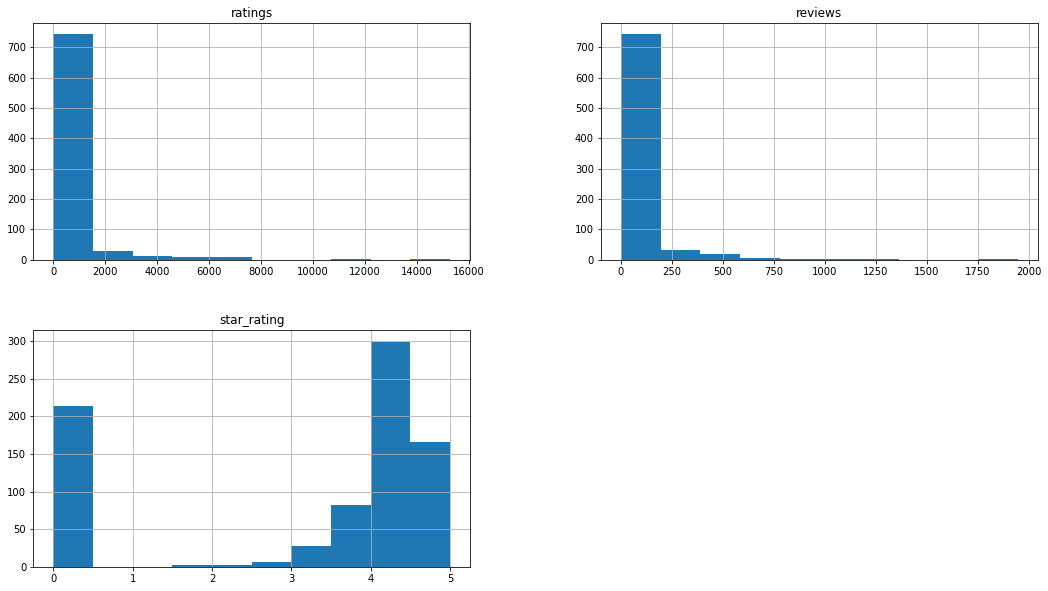

In [18]:
new_df.hist(['ratings', 'reviews', 'star_rating'], figsize=(18,10))

# Feature Selection

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

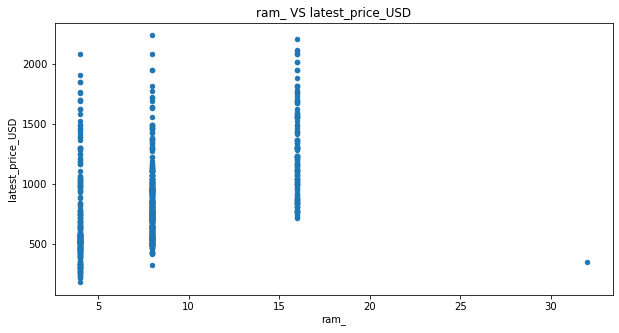

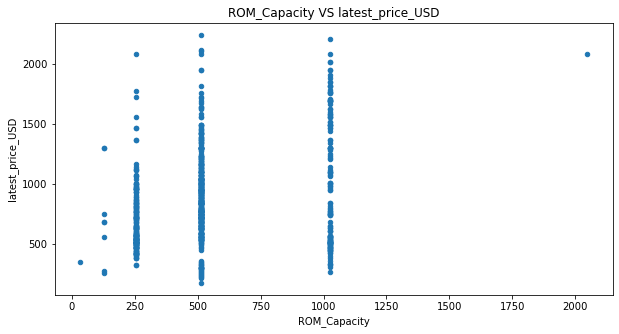

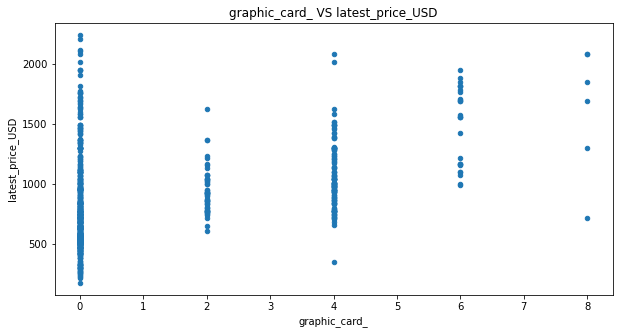

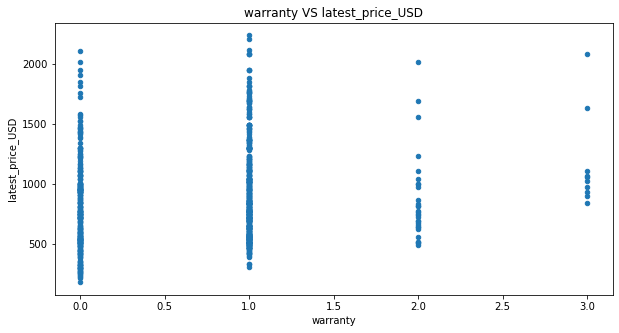

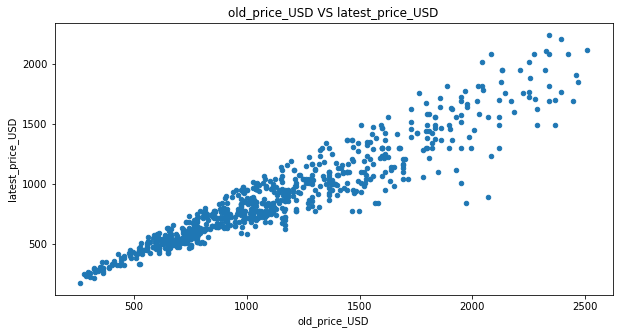

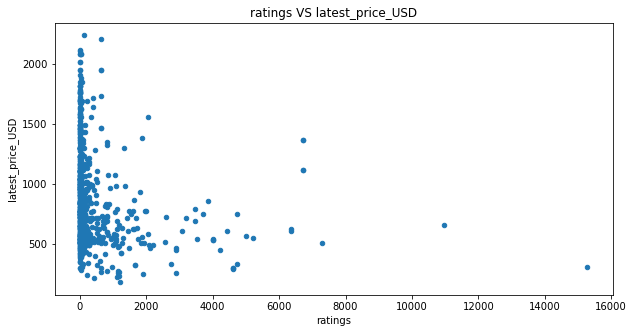

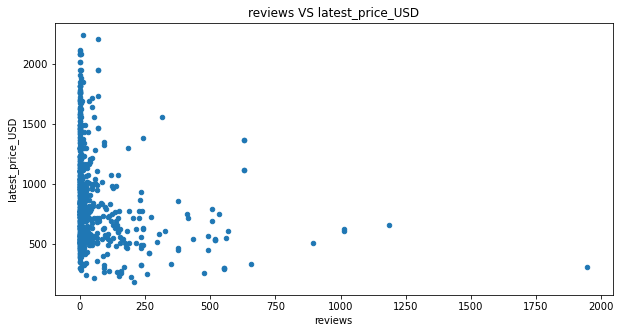

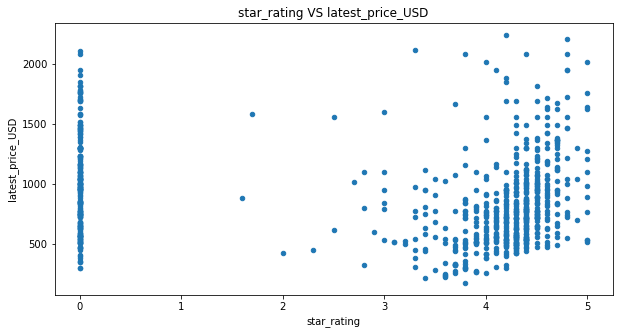

In [19]:
ContinuousCols=['ram_', 'ROM_Capacity', 'graphic_card_', 'warranty', 
                'old_price_USD','ratings', 'reviews', 'star_rating']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    new_df.plot.scatter(x=predictor, y='latest_price_USD', figsize=(10,5), title=predictor+" VS "+ 'latest_price_USD')

## Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [20]:
# Calculating correlation matrix
ContinuousCols1=['latest_price_USD', 'ram_', 'ROM_Capacity', 'graphic_card_', 'warranty', 
                'old_price_USD','ratings', 'reviews', 'star_rating']

# Creating the correlation matrix
CorrelationData=new_df[ContinuousCols1].corr()
CorrelationData

,latest_price_USD,ram_,ROM_Capacity,graphic_card_,warranty,old_price_USD,ratings,reviews,star_rating
latest_price_USD,1.000000,0.450656,0.277795,0.422153,0.146277,0.945842,-0.176254,-0.193521,-0.170834
ram_,0.450656,1.000000,0.096314,0.276326,0.105582,0.449823,-0.126370,-0.131372,0.000742
ROM_Capacity,0.277795,0.096314,1.000000,0.207219,-0.007073,0.294753,-0.001839,-0.006105,-0.083116
graphic_card_,0.422153,0.276326,0.207219,1.000000,0.024570,0.463804,-0.026074,-0.027321,0.019002
warranty,0.146277,0.105582,-0.007073,0.024570,1.000000,0.174336,0.047009,0.037439,0.097127
old_price_USD,0.945842,0.449823,0.294753,0.463804,0.174336,1.000000,-0.193624,-0.206717,-0.165689
ratings,-0.176254,-0.126370,-0.001839,-0.026074,0.047009,-0.193624,1.000000,0.984459,0.214835
reviews,-0.193521,-0.131372,-0.006105,-0.027321,0.037439,-0.206717,0.984459,1.000000,0.217568
star_rating,-0.170834,0.000742,-0.083116,0.019002,0.097127,-0.165689,0.214835,0.217568,1.000000


In [21]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['latest_price_USD'][abs(CorrelationData['latest_price_USD']) > 0.2 ]

latest_price_USD    1.000000
ram_                0.450656
ROM_Capacity        0.277795
graphic_card_       0.422153
old_price_USD       0.945842
Name: latest_price_USD, dtype: float64

## Relationship exploration: Categorical Vs Continuous -- Box Plots

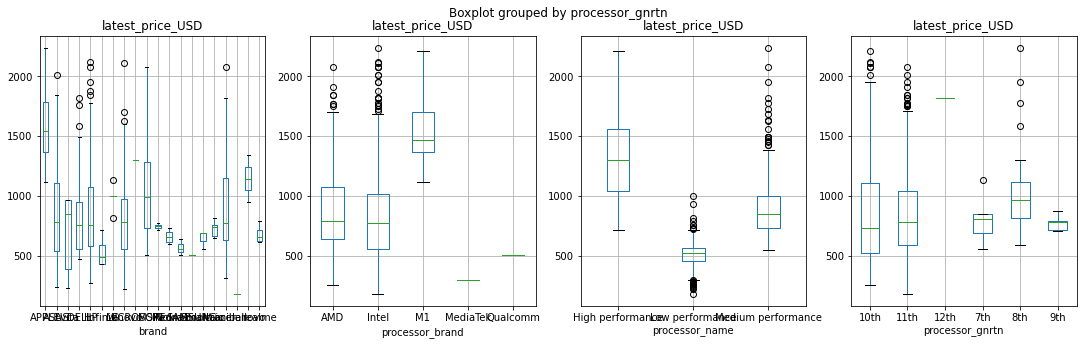

In [22]:
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    new_df.boxplot(column='latest_price_USD', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

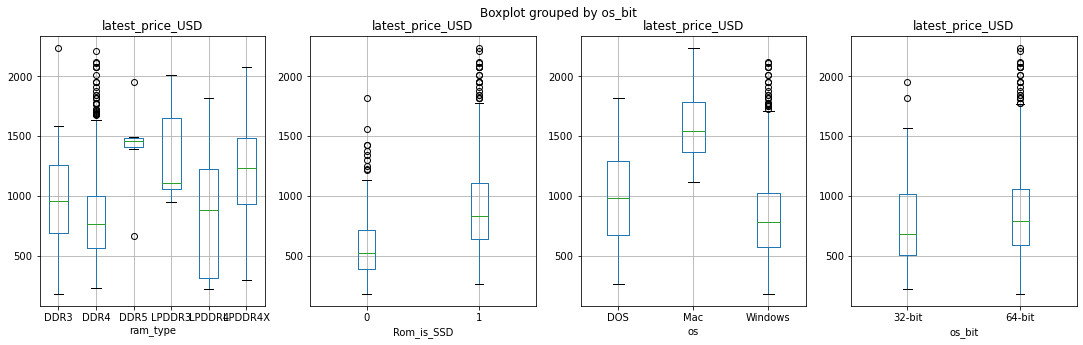

In [23]:
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['ram_type', 'Rom_is_SSD', 'os', 'os_bit']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    new_df.boxplot(column='latest_price_USD', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

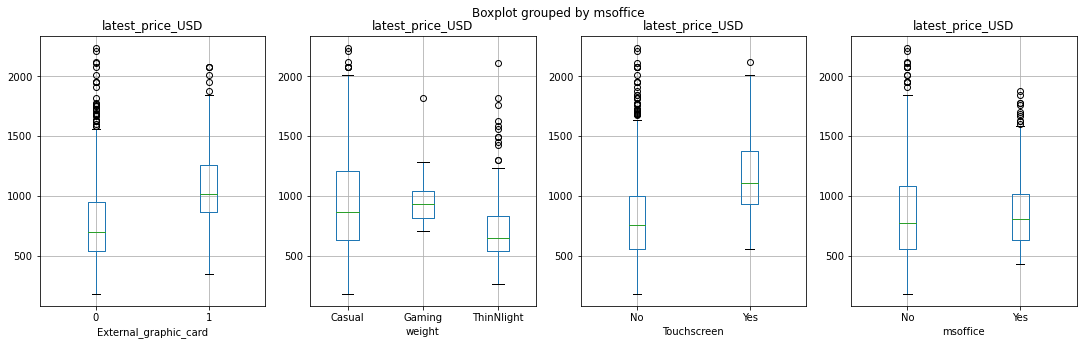

In [24]:
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['External_graphic_card', 'weight','Touchscreen', 'msoffice']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    new_df.boxplot(column='latest_price_USD', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [25]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [26]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
                          'ram_type', 'Rom_is_SSD', 'os', 'os_bit', 'External_graphic_card', 
                          'weight','Touchscreen', 'msoffice']

FunctionAnova(inpData=new_df, 
              TargetVariable='latest_price_USD', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

brand is correlated with latest_price_USD | P-Value: 3.864118621508208e-17
processor_brand is correlated with latest_price_USD | P-Value: 3.079001720070079e-14
processor_name is correlated with latest_price_USD | P-Value: 4.620227618410402e-153
processor_gnrtn is correlated with latest_price_USD | P-Value: 0.015882304049994023
ram_type is correlated with latest_price_USD | P-Value: 2.7179149746347075e-13
Rom_is_SSD is correlated with latest_price_USD | P-Value: 1.6418718294271964e-18
os is correlated with latest_price_USD | P-Value: 2.9606300737909206e-18
os_bit is correlated with latest_price_USD | P-Value: 0.01126220195720438
External_graphic_card is correlated with latest_price_USD | P-Value: 6.346908349149227e-26
weight is correlated with latest_price_USD | P-Value: 3.3721904713186287e-15
Touchscreen is correlated with latest_price_USD | P-Value: 3.297605158306453e-15
msoffice is NOT correlated with latest_price_USD | P-Value: 0.5853812246255314


['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_type',
 'Rom_is_SSD',
 'os',
 'os_bit',
 'External_graphic_card',
 'weight',
 'Touchscreen']

## Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [27]:
SelectedColumns=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_type', 'Rom_is_SSD', 
                 'os', 'External_graphic_card', 'weight', 'Touchscreen', 'msoffice', 'ram_', 'ROM_Capacity', 
                 'graphic_card_', 'old_price_USD']

# Selecting final columns
DataForML=new_df[SelectedColumns]
DataForML.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_type,Rom_is_SSD,os,External_graphic_card,weight,Touchscreen,msoffice,ram_,ROM_Capacity,graphic_card_,old_price_USD
0,Lenovo,AMD,Low performance,10th,DDR4,0,Windows,0,ThinNlight,No,No,4,1024,0,426.270
1,Lenovo,AMD,Low performance,10th,DDR4,0,Windows,0,Casual,No,No,4,512,0,277.225
2,Avita,AMD,Low performance,10th,DDR4,1,Windows,0,ThinNlight,No,No,4,128,0,363.870
3,Avita,AMD,Low performance,10th,DDR4,1,Windows,0,ThinNlight,No,No,4,128,0,363.870
4,Avita,AMD,Low performance,10th,DDR4,1,Windows,0,ThinNlight,No,No,4,256,0,435.370


In [28]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

Converting each Ordinal Categorical columns to numeric
Converting Binary nominal Categorical columns to numeric using 1/0 mapping
Converting all other nominal categorical columns to numeric using pd.get_dummies()
Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

### Converting the binary nominal variable to numeric using 1/0 mapping

In [29]:
DataForML.nunique()

brand                     20
processor_brand            5
processor_name             3
processor_gnrtn            6
ram_type                   6
Rom_is_SSD                 2
os                         3
External_graphic_card      2
weight                     3
Touchscreen                2
msoffice                   2
ram_                       4
ROM_Capacity               6
graphic_card_              5
old_price_USD            526
dtype: int64

In [30]:
# Converting binary nominal values to numeric 
DataForML['Touchscreen'].replace({'No':0, 'Yes':1}, inplace=True)
DataForML['msoffice'].replace({'No':0, 'Yes':1}, inplace=True)

D:\rs7am\Anaconda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [31]:
DataForML

,brand,processor_brand,processor_name,processor_gnrtn,ram_type,Rom_is_SSD,os,External_graphic_card,weight,Touchscreen,msoffice,ram_,ROM_Capacity,graphic_card_,old_price_USD
0,Lenovo,AMD,Low performance,10th,DDR4,0,Windows,0,ThinNlight,0,0,4,1024,0,426.270
1,Lenovo,AMD,Low performance,10th,DDR4,0,Windows,0,Casual,0,0,4,512,0,277.225
2,Avita,AMD,Low performance,10th,DDR4,1,Windows,0,ThinNlight,0,0,4,128,0,363.870
3,Avita,AMD,Low performance,10th,DDR4,1,Windows,0,ThinNlight,0,0,4,128,0,363.870
4,Avita,AMD,Low performance,10th,DDR4,1,Windows,0,ThinNlight,0,0,4,256,0,435.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,ASUS,AMD,High performance,11th,DDR4,1,Windows,0,Casual,0,0,4,1024,0,2118.870
887,ASUS,AMD,High performance,11th,DDR4,1,Windows,1,Casual,0,0,4,1024,4,1949.870
890,ASUS,AMD,High performance,11th,DDR4,1,Windows,0,Casual,0,0,4,1024,0,2248.870
894,SAMSUNG,Qualcomm,Low performance,11th,LPDDR4X,0,Windows,0,Casual,0,0,4,512,0,623.870


### Converting the nominal variable to numeric using get_dummies()

In [32]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['latest_price_USD']=new_df['latest_price_USD']

# Printing sample rows
DataForML_Numeric.head()

,Rom_is_SSD,External_graphic_card,Touchscreen,msoffice,ram_,ROM_Capacity,graphic_card_,old_price_USD,brand_APPLE,brand_ASUS,...,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight,latest_price_USD
0,0,0,0,0,4,1024,0,426.270,0,0,...,0,0,0,0,0,1,0,0,1,324.87
1,0,0,0,0,4,512,0,277.225,0,0,...,0,0,0,0,0,1,1,0,0,254.67
2,1,0,0,0,4,128,0,363.870,0,0,...,0,0,0,0,0,1,0,0,1,259.87
3,1,0,0,0,4,128,0,363.870,0,0,...,0,0,0,0,0,1,0,0,1,279.37
4,1,0,0,0,4,256,0,435.370,0,0,...,0,0,0,0,0,1,0,0,1,324.87


## Machine Learning: Splitting the data into Training and Testing sample

In [33]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Rom_is_SSD', 'External_graphic_card', 'Touchscreen', 'msoffice',
       'ram_', 'ROM_Capacity', 'graphic_card_', 'old_price_USD', 'brand_APPLE',
       'brand_ASUS', 'brand_Avita', 'brand_DELL', 'brand_HP', 'brand_Infinix',
       'brand_LG', 'brand_Lenovo', 'brand_MICROSOFT', 'brand_MSI', 'brand_Mi',
       'brand_Nokia', 'brand_RedmiBook', 'brand_SAMSUNG', 'brand_Smartron',
       'brand_Vaio', 'brand_acer', 'brand_iball', 'brand_lenovo',
       'brand_realme', 'processor_brand_AMD', 'processor_brand_Intel',
       'processor_brand_M1', 'processor_brand_MediaTek',
       'processor_brand_Qualcomm', 'processor_name_High performance',
       'processor_name_Low performance', 'processor_name_Medium performance',
       'processor_gnrtn_10th', 'processor_gnrtn_11th', 'processor_gnrtn_12th',
       'processor_gnrtn_7th', 'processor_gnrtn_8th', 'processor_gnrtn_9th',
       'ram_type_DDR3', 'ram_type_DDR4', 'ram_type_DDR5', 'ram_type_LPDDR3',
       'ram_type_LPDDR4', 'ram_type_LPD

In [34]:
# Separate Target Variable and Predictor Variables
TargetVariable='latest_price_USD'
Predictors=['Rom_is_SSD', 'External_graphic_card', 'Touchscreen', 'msoffice',
            'ram_', 'ROM_Capacity', 'graphic_card_', 'old_price_USD',
            'brand_ALIENWARE', 'brand_APPLE', 'brand_ASUS', 'brand_Avita',
            'brand_DELL', 'brand_HP', 'brand_Infinix', 'brand_LG', 'brand_Lenovo',
            'brand_MICROSOFT', 'brand_MSI', 'brand_Mi', 'brand_Nokia',
            'brand_RedmiBook', 'brand_SAMSUNG', 'brand_Smartron', 'brand_Vaio',
            'brand_acer', 'brand_iball', 'brand_lenovo', 'brand_realme',
            'processor_brand_AMD', 'processor_brand_Intel', 'processor_brand_M1',
            'processor_brand_MediaTek', 'processor_brand_Qualcomm',
            'processor_name_High performance', 'processor_name_Low performance',
            'processor_name_Medium performance', 'processor_gnrtn_10th',
            'processor_gnrtn_11th', 'processor_gnrtn_12th', 'processor_gnrtn_7th',
            'processor_gnrtn_8th', 'processor_gnrtn_9th', 'ram_type_DDR3',
            'ram_type_DDR4', 'ram_type_DDR5', 'ram_type_LPDDR3', 'ram_type_LPDDR4',
            'ram_type_LPDDR4X', 'os_DOS', 'os_Mac', 'os_Windows', 'weight_Casual',
            'weight_Gaming', 'weight_ThinNlight']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=587)
 

KeyError: "['brand_ALIENWARE'] not in index"

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Multiple Linear Regression

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['latest_price_USD']-TestingDataResults['Predictedlatest_price_USD']))/TestingDataResults['latest_price_USD'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## AdaBoost

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=15)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['latest_price_USD']-TestingDataResults['Predictedlatest_price_USD']))/TestingDataResults['latest_price_USD'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=15, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['latest_price_USD']-TestingDataResults['Predictedlatest_price_USD']))/TestingDataResults['latest_price_USD'])



MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Deployment of the Model

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='latest_price_USD'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Rom_is_SSD', 'External_graphic_card', 'Touchscreen', 'msoffice',
            'ram_', 'ROM_Capacity', 'graphic_card_', 'old_price_USD',
            'brand_ALIENWARE', 'brand_APPLE', 'brand_ASUS', 'brand_Avita',
            'brand_DELL', 'brand_HP', 'brand_Infinix', 'brand_LG', 'brand_Lenovo',
            'brand_MICROSOFT', 'brand_MSI', 'brand_Mi', 'brand_Nokia',
            'brand_RedmiBook', 'brand_SAMSUNG', 'brand_Smartron', 'brand_Vaio',
            'brand_acer', 'brand_iball', 'brand_lenovo', 'brand_realme',
            'processor_brand_AMD', 'processor_brand_Intel', 'processor_brand_M1',
            'processor_brand_MediaTek', 'processor_brand_Qualcomm',
            'processor_name_High performance', 'processor_name_Low performance',
            'processor_name_Medium performance', 'processor_gnrtn_10th',
            'processor_gnrtn_11th', 'processor_gnrtn_12th', 'processor_gnrtn_7th',
            'processor_gnrtn_8th', 'processor_gnrtn_9th', 'ram_type_DDR3',
            'ram_type_DDR4', 'ram_type_DDR5', 'ram_type_LPDDR3', 'ram_type_LPDDR4',
            'ram_type_LPDDR4X', 'os_DOS', 'os_Mac', 'os_Windows', 'weight_Casual',
            'weight_Gaming', 'weight_ThinNlight']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

### Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=15, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### Step 1. Retraining the model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

#### Step 3. Create a python function

In [ ]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Treating the binary nominal variables first
    DataForML['Touchscreen'].replace({'No':0, 'Yes':1}, inplace=True)
    DataForML['msoffice'].replace({'No':0, 'Yes':1}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Rom_is_SSD', 'External_graphic_card', 'Touchscreen', 'msoffice',
                'ram_', 'ROM_Capacity', 'graphic_card_', 'old_price_USD',
                'brand_ALIENWARE', 'brand_APPLE', 'brand_ASUS', 'brand_Avita',
                'brand_DELL', 'brand_HP', 'brand_Infinix', 'brand_LG', 'brand_Lenovo',
                'brand_MICROSOFT', 'brand_MSI', 'brand_Mi', 'brand_Nokia',
                'brand_RedmiBook', 'brand_SAMSUNG', 'brand_Smartron', 'brand_Vaio',
                'brand_acer', 'brand_iball', 'brand_lenovo', 'brand_realme',
                'processor_brand_AMD', 'processor_brand_Intel', 'processor_brand_M1',
                'processor_brand_MediaTek', 'processor_brand_Qualcomm',
                'processor_name_High performance', 'processor_name_Low performance',
                'processor_name_Medium performance', 'processor_gnrtn_10th',
                'processor_gnrtn_11th', 'processor_gnrtn_12th', 'processor_gnrtn_7th',
                'processor_gnrtn_8th', 'processor_gnrtn_9th', 'ram_type_DDR3',
                'ram_type_DDR4', 'ram_type_DDR5', 'ram_type_LPDDR3', 'ram_type_LPDDR4',
                'ram_type_LPDDR4X', 'os_DOS', 'os_Mac', 'os_Windows', 'weight_Casual',
                'weight_Gaming', 'weight_ThinNlight']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genprice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [ ]:
# Calling the function for some new data
NewSampleData=pd.read_csv('deployment.csv')

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)